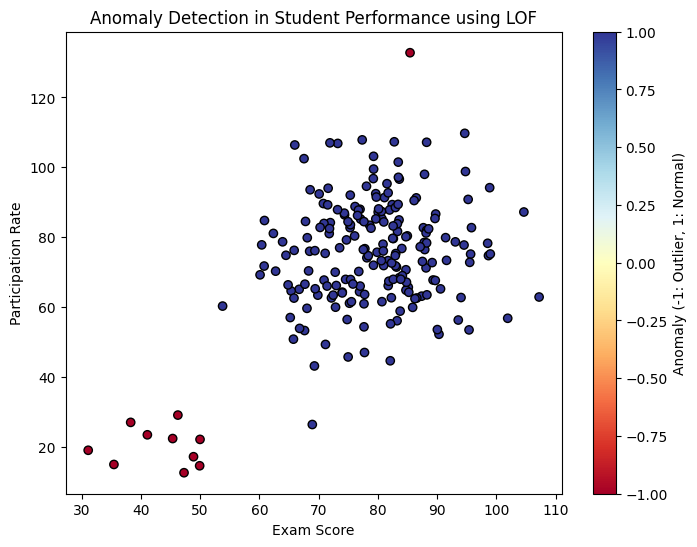

Detected Anomalies:
     exam_score  participation_rate  anomaly
9     85.425600          132.790972       -1
200   38.296390           26.992948       -1
201   35.468141           14.946962       -1
202   31.127510           19.010883       -1
203   47.294448           12.583188       -1
204   46.258020           29.081021       -1
205   49.994353           22.123493       -1
206   49.932737           14.572856       -1
207   41.108634           23.434014       -1
208   45.379748           22.362565       -1
209   48.895315           17.163254       -1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Generate synthetic student performance data
np.random.seed(42)
n_students = 200

# Normal students: scores between 60-100, participation between 50-100%
exam_scores = np.random.normal(80, 10, n_students)
participation = np.random.normal(75, 15, n_students)

# Introduce anomalies (students with low scores and participation)
n_anomalies = 10
anomalous_scores = np.random.uniform(30, 50, n_anomalies)  # Low scores
anomalous_participation = np.random.uniform(10, 30, n_anomalies)  # Low participation

# Merge normal and anomalous data
exam_scores = np.concatenate([exam_scores, anomalous_scores])
participation = np.concatenate([participation, anomalous_participation])

# Create DataFrame
df = pd.DataFrame({'exam_score': exam_scores, 'participation_rate': participation})

# Step 2: Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['anomaly'] = lof.fit_predict(df[['exam_score', 'participation_rate']])

# Step 3: Visualize Results
plt.figure(figsize=(8,6))
plt.scatter(df['exam_score'], df['participation_rate'], c=df['anomaly'], cmap='RdYlBu', edgecolors='k')
plt.xlabel('Exam Score')
plt.ylabel('Participation Rate')
plt.title('Anomaly Detection in Student Performance using LOF')
plt.colorbar(label='Anomaly (-1: Outlier, 1: Normal)')
plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(df[df['anomaly'] == -1])